Adapted to notebook form from http://scipy-cookbook.readthedocs.io/items/FIRFilter.html with style cleanup, and an extra plot

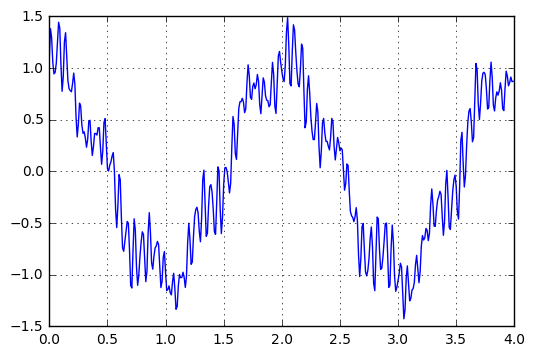

In [50]:
import numpy as np
from numpy import pi
from scipy.signal import kaiserord, lfilter, firwin, freqz
from matplotlib import pyplot as plt
%matplotlib inline


#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = 100.0
nsamples = 400
t = np.arange(nsamples) / sample_rate
x = (np.cos(2*pi*0.5*t) + 0.2*np.sin(2*pi*2.5*t+0.1) +
    0.2*np.sin(2*pi*15.3*t) + 0.1*np.sin(2*pi*16.7*t + 0.1) +
    0.1*np.sin(2*pi*23.45*t+.8))

plt.plot(t,x)
plt.grid(True)

In [23]:
#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

plt.figure(1)
plt.plot(taps, 'bo-', linewidth=2)
plt.title('Filter Coefficients (%d taps)' % N)
plt.grid(True)


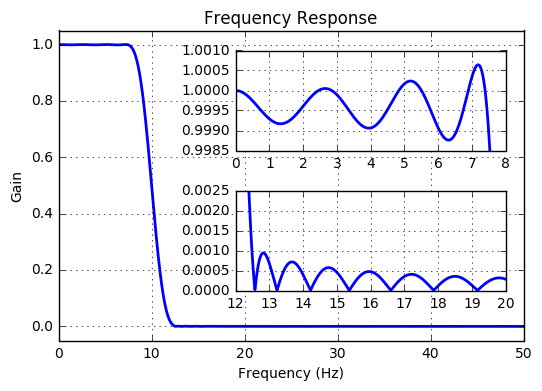

In [47]:
#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

plt.figure(2)
plt.clf()
w, h = freqz(taps, worN=8000)
plt.plot((w/pi)*nyq_rate, np.abs(h), linewidth=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.title('Frequency Response')
plt.ylim(-0.05, 1.05)
plt.grid(True)

# Upper inset plot.
ax1 = plt.axes([0.42, 0.6, .45, .25])
plt.plot((w/pi)*nyq_rate, np.abs(h), linewidth=2)
plt.xlim(0,8.0)
plt.ylim(0.9985, 1.001)
plt.grid(True)

# Lower inset plot
ax2 = plt.axes([0.42, 0.25, .45, .25])
plt.plot((w/pi)*nyq_rate, np.abs(h), linewidth=2)
plt.xlim(12.0, 20.0)
plt.ylim(0.0, 0.0025)
plt.grid(True)


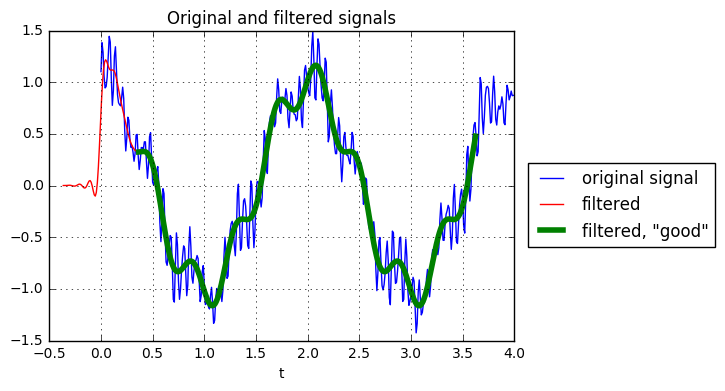

In [46]:
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

plt.figure(3)
plt.plot(t, x, label='original signal')
plt.plot(t-delay, filtered_x, 'r-', label='filtered')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plt.plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4, label='filtered, "good"')

plt.xlabel('t')
plt.title('Original and filtered signals')
plt.legend(bbox_to_anchor=(1.45,0.6))
plt.grid(True)

plt.show()